# Results postprocessing

In [132]:
from ase import io
from tqdm import tqdm

# dir_snaps = "/home/qklmn/repos/rotor-gp/code/results/temp/temp_calc_dir_0/ase_calc_history/"
# dir_snaps_2 = "/home/qklmn/repos/rotor-gp/results/train_and_run/2023-09-01_17 01-54_542103/ase_calc_history/"

dir_snaps_2 = "/home/qklmn/repos/rotor-gp/results/train_and_run/2023-09-04_11 44-08_105531/ase_calc_history/"
dir_snaps_1 = "/home/qklmn/repos/rotor-gp/results/train_and_run/2023-09-06_15 40-21_760043/ase_calc_history/"

snapshot_list_1 = []
snapshot_list_2 = []
for i in tqdm(range(0, 10000)):
    snapshot_list_1.append( io.read( dir_snaps_1+str(i)+".xyz", format="extxyz") )
    snapshot_list_2.append( io.read( dir_snaps_2+str(i)+".xyz", format="extxyz") )

100%|██████████| 10000/10000 [01:17<00:00, 129.14it/s]


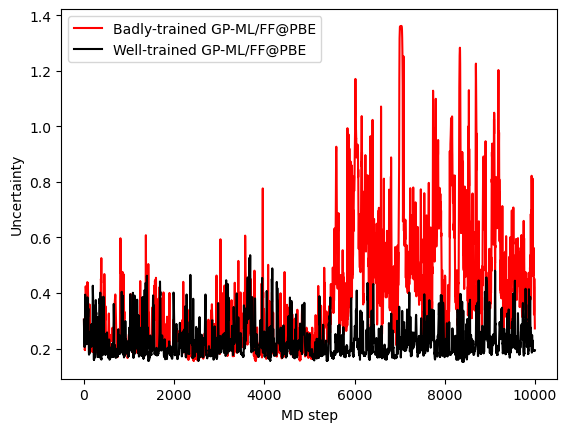

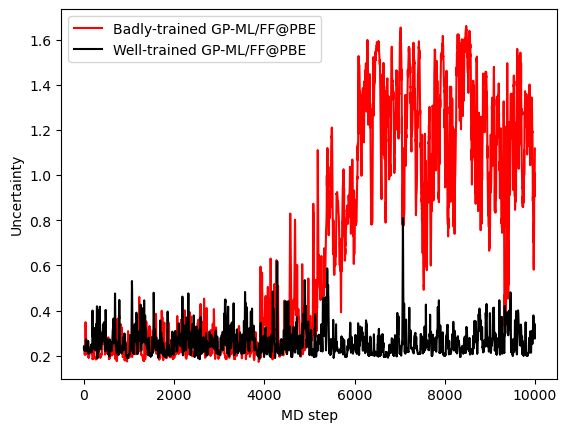

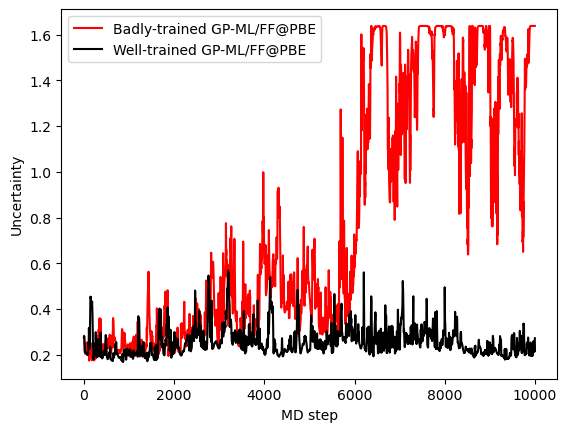

In [157]:
index_H = 134
max_var_1 = [snap.arrays['forces_variance'][index_H].max() for snap in snapshot_list_1]
max_var_2 = [snap.arrays['forces_variance'][index_H].max() for snap in snapshot_list_2]
plt.plot(max_var_1, color="red", label="Badly-trained GP-ML/FF@PBE")
plt.plot(max_var_2, color="black", label="Well-trained GP-ML/FF@PBE")
plt.xlabel("MD step")
plt.ylabel("Uncertainty")
plt.legend()
plt.show()

index_C = 42
max_var_1 = [snap.arrays['forces_variance'][index_C].max() for snap in snapshot_list_1]
max_var_2 = [snap.arrays['forces_variance'][index_C].max() for snap in snapshot_list_2]
plt.plot(max_var_1, color="red", label="Badly-trained GP-ML/FF@PBE")
plt.plot(max_var_2, color="black", label="Well-trained GP-ML/FF@PBE")
plt.xlabel("MD step")
plt.ylabel("Uncertainty")
plt.legend()
plt.show()


index_Si = 0
max_var_1 = [snap.arrays['forces_variance'][index_Si].max() for snap in snapshot_list_1]
max_var_2 = [snap.arrays['forces_variance'][index_Si].max() for snap in snapshot_list_2]
plt.plot(max_var_1, color="red", label="Badly-trained GP-ML/FF@PBE")
plt.plot(max_var_2, color="black", label="Well-trained GP-ML/FF@PBE")
plt.xlabel("MD step")
plt.ylabel("Uncertainty")
plt.legend()
plt.show()

In [ ]:
fmax_list = [snap.get_forces().max() for snap in snapshot_list]

In [ ]:
forces_ipi_raw_xyz = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_ref/PREFIX.frc_00.xyz", index=":")

In [ ]:
forces_ipi_raw_xyz[0].get_chemical_symbols()[100]

In [ ]:
from ase import units
import numpy as np

forces_ipi = np.array( [s.get_positions()*(units.Hartree/units.Bohr) for s in forces_ipi_raw_xyz] )

In [ ]:
fmax = forces_ipi[:,:,0].max(axis=1)
fmin = forces_ipi[:,:,0].min(axis=1)

fabs_mean = np.abs(forces_ipi).mean()
fabs_var = np.abs(forces_ipi).var()

fmax.shape

In [ ]:
fabs_var

In [ ]:
import matplotlib.pyplot as plt


plt.plot(fmax[0:1000])
plt.plot(fmin)

plt.show()

# Check statistics within training data

In [ ]:
traj_dftb_2100 = io.read("/home/qklmn/data/datasets/rotors/different_temperatures/dftb/traj_2100.traj", index=":")
traj_dftb_300 = io.read("/home/qklmn/data/datasets/rotors/different_temperatures/dftb/traj_300.traj", index=":")

In [ ]:
fmax_300 = [snap.get_forces().max() for snap in traj_dftb_300]

In [ ]:
plt.plot(fmax_300)

## Check 1 vs. 16 beads

In [228]:
from ase import io
import numpy as np
from tqdm import tqdm

In [ ]:
traj_1 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_1/PREFIX.pos_0.xyz", index=":")
traj_16 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_16/PREFIX.pos_00.xyz", index=":")
traj_32 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_32/PREFIX.pos_10.xyz", index=":")
traj_64 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_64/PREFIX.pos_00.xyz", index=":")
# traj_16_centroid = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_16/PREFIX.pos_centroid.xyz", index=":")



In [ ]:
traj_1_good =  io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_good_1/PREFIX.pos_0.xyz", index=":")
traj_16_good =  io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_good_16/PREFIX.pos_00.xyz", index=":")

In [1]:
traj_1_ml = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_ml_1//PREFIX.pos_0.xyz", index=":")
traj_16_ml = io.read("/home/qklmn/repos/rotor-gp/code/pimd/outout_ml_16//PREFIX.pos_00.xyz", index=":")

NameError: name 'io' is not defined

In [3]:
traj_1_ml_dft = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_ml_DFT_1//PREFIX.pos_0.xyz", index=":")
traj_16_ml_dft = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_ml_DFT_16//PREFIX.pos_00.xyz", index=":")

In [227]:
str(12).zfill(2)

'12'

In [229]:
traj_16_ml_dft_list = []

for i in range(16):
        traj_16_ml_dft_list.append( io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_ml_DFT_16//PREFIX.pos_" + str(i).zfill(2) + ".xyz", index=":")  )

In [ ]:
distances_1 = [ snap.get_all_distances() for snap in traj_1] 
distances_1 = np.array(distances_1)

In [ ]:
distances_16 = [ snap.get_all_distances() for snap in traj_16]
distances_16 = np.array(distances_16)

In [ ]:
distances_1_good = [ snap.get_all_distances() for snap in traj_1_good]
distances_1_good = np.array(distances_1_good)

In [6]:
distances_1_ml = [ snap.get_all_distances() for snap in tqdm(traj_1_ml)]
distances_1_ml = np.array(distances_1_ml)

NameError: name 'traj_1_ml' is not defined

In [ ]:
distances_16_ml = [ snap.get_all_distances() for snap in tqdm(traj_16_ml)]
distances_16_ml = np.array(distances_16_ml)

In [7]:
distances_1_ml_dft = [ snap.get_all_distances() for snap in tqdm(traj_1_ml_dft)]
distances_1_ml_dft = np.array(distances_1_ml_dft)

100%|██████████| 10001/10001 [00:49<00:00, 202.78it/s]


In [8]:
distances_16_ml_dft = [ snap.get_all_distances() for snap in tqdm(traj_16_ml_dft)]
distances_16_ml_dft = np.array(distances_16_ml_dft)

100%|██████████| 10001/10001 [00:48<00:00, 204.34it/s]


In [ ]:
distances_16_good = [ snap.get_all_distances() for snap in traj_16_good]
distances_16_good = np.array(distances_16_good)

In [ ]:
distances_32 = [ snap.get_all_distances() for snap in traj_32]
distances_32 = np.array(distances_32)

In [ ]:
distances_64 = [ snap.get_all_distances() for snap in traj_64]
distances_64 = np.array(distances_64)

In [ ]:
# distances_16_c = [ snap.get_all_distances() for snap in traj_16_centroid]
# distances_16_c = np.array(distances_16_c)

In [ ]:
distances_1.shape

In [ ]:
distances_64[:, dind[0], dind[1]].shape

In [161]:
distances_16_ml_dft.shape

(10001, 264, 264)

In [ ]:
traj_64[0][dind]

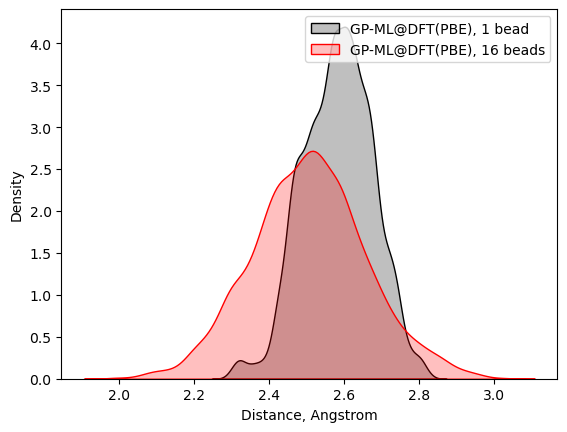

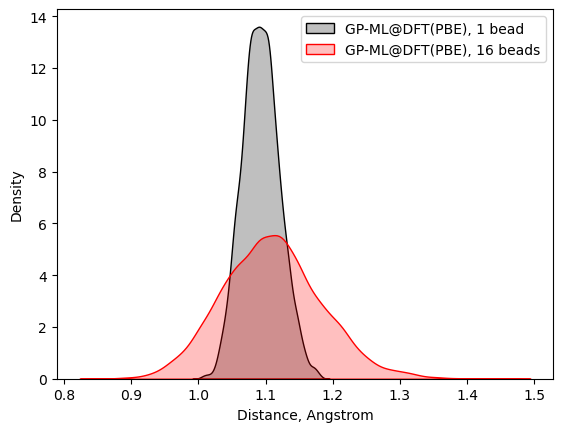

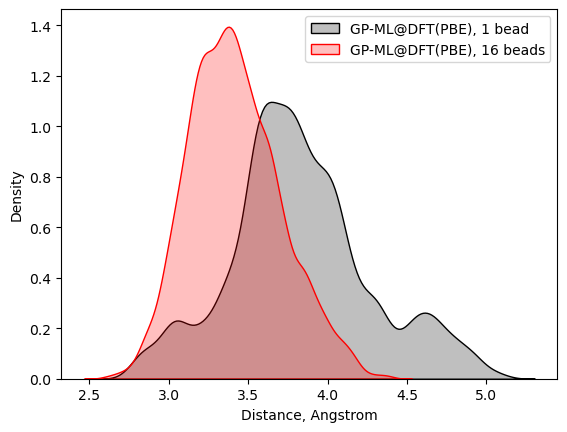

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

dind_H = np.s_[105,135] #np.s_[117, 124] #dind = np.s_[7, 104] # 119,134 - two ring protons, 123, 136
# plt.hist(distances_1[:, dind[0], dind[1]], label="1 bead", alpha=0.5)
# plt.hist(distances_16[:, dind[0], dind[1]], label="16 beads", alpha=0.5)
# # plt.hist(distances_32[:, dind[0], dind[1]], label="32 beads", alpha=0.5)
# # plt.hist(distances_64[:, dind[0], dind[1]], label="64 beads", alpha=0.5)
# # plt.hist(distances_16_c, label="16 beads, centroid", alpha=0.5)
# plt.hist(distances_1_good[:, dind[0], dind[1]], label="1 beads, good", alpha=0.5)
# plt.hist(distances_16_good[:, dind[0], dind[1]], label="16 beads, good", alpha=0.5)
# plt.legend()
# plt.show()

# sns.kdeplot(distances_1[:, dind[0], dind[1]], label="1 beads", color="green")
# sns.kdeplot(distances_16[:, dind[0], dind[1]], label="16 beads", color="green")
# sns.kdeplot(distances_1_good[:, dind[0], dind[1]], label="PIMD 1, good", color='black')
# sns.kdeplot(distances_16_good[:, dind[0], dind[1]], label="PIMD 16, good", color='red')

# sns.kdeplot(distances_1_ml[:, dind[0], dind[1]], label="ML, 1 beads", color="black")
# sns.kdeplot(distances_16_ml[:, dind[0], dind[1]], label="ML, 16 beads", color="blue")
sns.kdeplot(distances_1_ml_dft[:, dind_H[0], dind_H[1]], label="GP-ML@DFT(PBE), 1 bead", color="black", fill=True)
sns.kdeplot(distances_16_ml_dft[:, dind_H[0], dind_H[1]], label="GP-ML@DFT(PBE), 16 beads", color="red", fill=True)
plt.xlabel("Distance, Angstrom")
plt.legend()
plt.show()

# print(distances_1[:, dind[0], dind[1]].mean(), distances_1[:, dind[0], dind[1]].var())
# print(distances_16[:, dind[0], dind[1]].mean(), distances_16[:, dind[0], dind[1]].var())
# print(distances_32[:, dind[0], dind[1]].mean(), distances_32[:, dind[0], dind[1]].var())
# print(distances_64[:, dind[0], dind[1]].mean(), distances_64[:, dind[0], dind[1]].var())
# print(distances_16_c.mean(), distances_16_c.var())

dind_CH = np.s_[21, 119] #dind = np.s_[7, 104] # 119,134 - two ring protons, 123, 136
sns.kdeplot(distances_1_ml_dft[:, dind_CH[0], dind_CH[1]], label="GP-ML@DFT(PBE), 1 bead", color="black", fill=True)
sns.kdeplot(distances_16_ml_dft[:, dind_CH[0], dind_CH[1]], label="GP-ML@DFT(PBE), 16 beads", color="red", fill=True)
plt.xlabel("Distance, Angstrom")
plt.legend()
plt.show()

dind_CHm = np.s_[121, 258] #dind = np.s_[7, 104] # 119,134 - two ring protons, 123, 136
sns.kdeplot(distances_1_ml_dft[:, dind_CHm[0], dind_CHm[1]], label="GP-ML@DFT(PBE), 1 bead", color="black", fill=True)
sns.kdeplot(distances_16_ml_dft[:, dind_CHm[0], dind_CHm[1]], label="GP-ML@DFT(PBE), 16 beads", color="red", fill=True)
plt.xlabel("Distance, Angstrom")
plt.legend()
plt.show()

In [175]:
layer_0 = [ 
        [106, 10, 26, 24], 
        [102, 6, 18, 16], 
        [104,8,44,42],     
        # [0,0,0,0],
        # [0,0,0,0],
        ]

layer_1 = [ 
        [103,9,45,47], 
        # [105,9,45,43], 
        [107,11,27,25],
        [107,7,19,21],       
        # [105,11,27,29] 
        ]


#Obtain normal indexing (from 0)
import numpy as np      
l0_v = np.array(layer_0)
l1_v = np.array(layer_1)

all_vert = np.array([l0_v, l1_v])

In [176]:
import numpy as np
from tqdm import tqdm

# import math

def normalize_angle_to_plus_minus_180(angle):
    result_angle = angle
    while result_angle > 180:
        result_angle -= 2 * 180
    while result_angle < - 180:
        result_angle += 2 * 180
    return result_angle 


def compute_angles(traj):
    # print("Started for indices:", indices)

    # traj = io.read(file_name, index=indices)
    L = len(traj)
    dihedrals = np.zeros( (2,4,L) )
    for ind, snap in enumerate(tqdm(traj)):
        for l in range(2):
                for r in range(3):
                    #     a = np.append(a, x)
                    # d = snap.get_dihedral(*all_vert[l,r,:])
                    dihedrals[l,r,ind] = normalize_angle_to_plus_minus_180( snap.get_dihedral(*all_vert[l,r,:]) )   
    # print("\n")
    # print("\nFinished for indices:", indices)
    return dihedrals

In [ ]:
dihedrals_1 = compute_angles(traj_1)
dihedrals_16 = compute_angles(traj_16)
dihedrals_32 = compute_angles(traj_32)
dihedrals_64 = compute_angles(traj_64)

In [ ]:
dihedrals_1_good = compute_angles(traj_1_good)
dihedrals_16_good = compute_angles(traj_16_good)

In [177]:
# dihedrals_1_ml = compute_angles(traj_1_ml)
# dihedrals_16_ml = compute_angles(traj_16_ml)
dihedrals_1_ml_dft = compute_angles(traj_1_ml_dft)
dihedrals_16_ml_dft = compute_angles(traj_16_ml_dft)

100%|██████████| 10001/10001 [00:06<00:00, 1511.35it/s]


In [231]:
dihedrals_1_ml_dft_list = []

for traj in traj_16_ml_dft_list:
    dihedrals_1_ml_dft_list.append( compute_angles(traj) )

100%|██████████| 10001/10001 [00:06<00:00, 1479.57it/s]


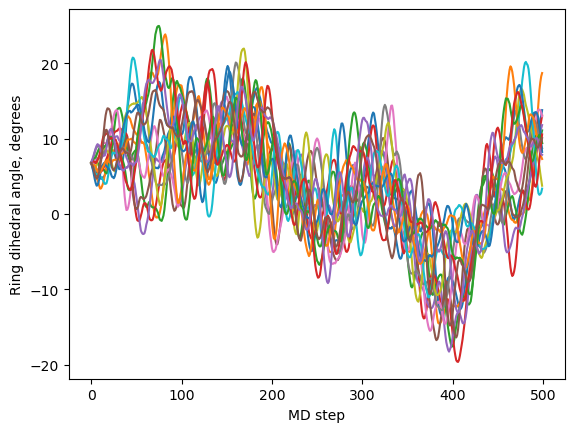

In [236]:
lr = np.s_[0, 0]

for dih in dihedrals_1_ml_dft_list:
    sns.lineplot(dih[lr][0:500])
plt.ylabel("Ring dihedral angle, degrees")
plt.xlabel("MD step")
# plt.legend()
plt.show()

In [ ]:
dihedrals_16_c = compute_angles(traj_16_centroid)

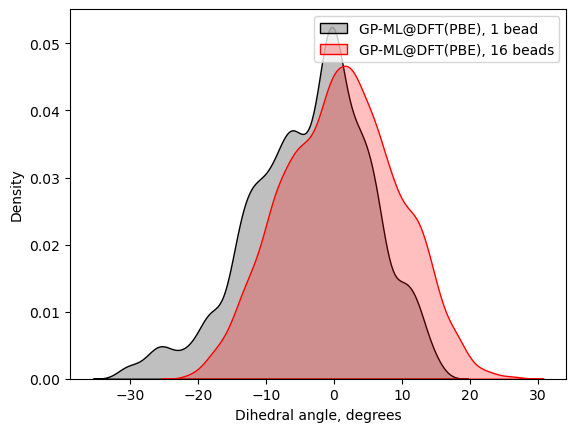

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

lr = np.s_[0, 0] # [1,0] is good

# plt.hist(dihedrals_1[lr], label="1 bead", alpha=0.5)
# # plt.hist(dihedrals_16[lr], label="16 beads", alpha=0.5)
# plt.hist(dihedrals_32[lr], label="32 beads", alpha=0.5)
# plt.hist(dihedrals_64[lr], label="64 beads", alpha=0.5)
# # plt.hist(dihedrals_16_c[lr], label="16 beads, centroid")
# plt.legend()
# plt.ylabel("Frequency")
# plt.xlabel("Dihedral angle, degree")
# plt.show()

# print(dihedrals_1[lr].mean(), dihedrals_1[lr].var())
# print(dihedrals_32[lr].mean(), dihedrals_32[lr].var())
# print(dihedrals_64[lr].mean(), dihedrals_64[lr].var())
# print(dihedrals_16_c[lr].mean(), dihedrals_16_c[lr].var())

# sns.kdeplot(dihedrals_1[lr], label="MD", linestyle='dashed', color='black')
# sns.kdeplot(dihedrals_16[lr], label="16 beads")
# sns.kdeplot(dihedrals_32[lr], label="32 beads")
# sns.kdeplot(dihedrals_64[lr], label="PIMD", color='black')

# sns.kdeplot(dihedrals_1_good[lr][0:1000], label="PIMD 1, good", color='black')
# sns.kdeplot(dihedrals_1_ml[lr], label="ML 1", color='black')
# sns.kdeplot(dihedrals_16_ml[lr], label="ML 16", color='blue')
sns.kdeplot(dihedrals_1_ml_dft[lr][:],  label="GP-ML@DFT(PBE), 1 bead", color='black', fill=True)
sns.kdeplot(dihedrals_16_ml_dft[lr][:],  label="GP-ML@DFT(PBE), 16 beads", color='red', fill=True)
# sns.kdeplot(dihedrals_16_good[lr][0:1000], label="PIMD 16, good", color='red')

plt.ylabel("Density")
plt.xlabel("Dihedral angle, degrees")
plt.legend()
plt.show()




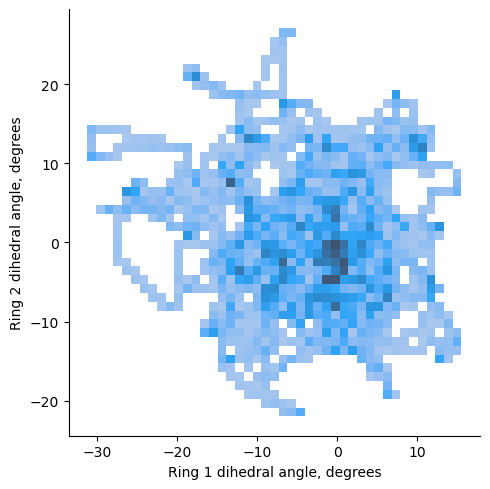

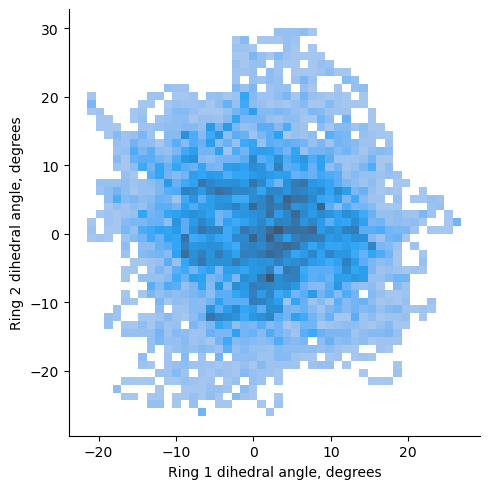

Correlation matrix: [[ 1.         -0.12239488]
 [-0.12239488  1.        ]]
Correlation matrix: [[ 1.         -0.05212088]
 [-0.05212088  1.        ]]


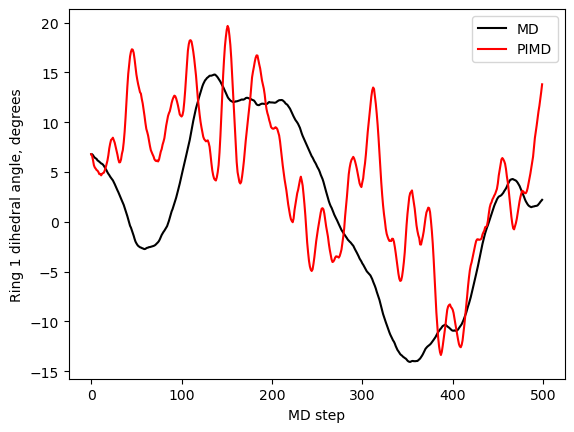

In [203]:
import pandas as pd


lr1 = np.s_[0, 0]
lr2 = np.s_[0, 1]

df_1_ml_dft = pd.DataFrame( np.array( [dihedrals_1_ml_dft[lr1][:], dihedrals_1_ml_dft[lr2][:]] ).transpose() , columns = ['Ring 1','Ring 2'])

df_16_ml_dft = pd.DataFrame( np.array( [dihedrals_16_ml_dft[lr1][:], dihedrals_16_ml_dft[lr2][:]] ).transpose() , columns = ['Ring 1','Ring 2'])

sns.displot(df_1_ml_dft, x="Ring 1", y="Ring 2")
plt.xlabel("Ring 1 dihedral angle, degrees")
plt.ylabel("Ring 2 dihedral angle, degrees")
sns.displot(df_16_ml_dft, x="Ring 1", y="Ring 2")
plt.xlabel("Ring 1 dihedral angle, degrees")
plt.ylabel("Ring 2 dihedral angle, degrees")
plt.show()

print("Correlation matrix:", np.corrcoef(dihedrals_1_ml_dft[lr1][:], dihedrals_1_ml_dft[lr2][:]) )
print("Correlation matrix:", np.corrcoef(dihedrals_16_ml_dft[lr1][:], dihedrals_16_ml_dft[lr2][:]) )


sns.lineplot(dihedrals_1_ml_dft[lr1][0:500], color='black', label="MD")
sns.lineplot(dihedrals_16_ml_dft[lr1][0:500], color='red', label="PIMD")
plt.ylabel("Ring 1 dihedral angle, degrees")
plt.xlabel("MD step")
plt.legend()
plt.show()


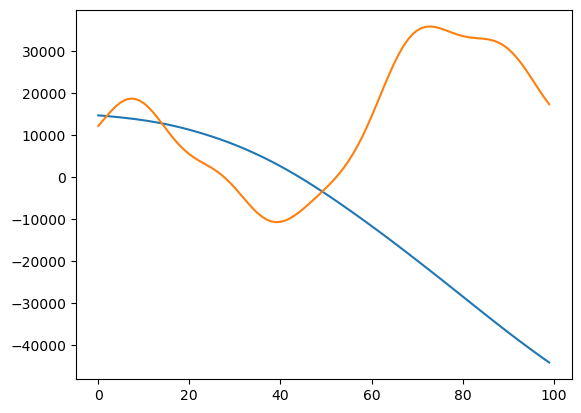

In [225]:
def compute_cross_corr(dihedrals, lr1, lr2 ):
    print("Starting worker for ", lr1, lr2)
    # print("Started for indices:", indices)
    array1_ = dihedrals[lr1[0], lr1[1],:]
    array2_ = dihedrals[lr2[0], lr2[1],:]
    array1_ = array1_ - np.mean(array1_)
    array2_ = array2_ - np.mean(array2_)
    cross_corr = np.correlate(array1_, array2_, mode="same")
    print("\n")
    print("\nFinished for: ", lr1, lr2)
    return cross_corr



lr1 = np.s_[0, 0]
lr2 = np.s_[1, 2]


array1_1 = dihedrals_1_ml_dft[lr1][:]
array2_1 = dihedrals_1_ml_dft[lr2][:]
array1_1 = array1_1 - np.mean(array1_1)
array2_1 = array2_1 - np.mean(array2_1)

array1_16 = dihedrals_16_ml_dft[lr1][:]
array2_16 = dihedrals_16_ml_dft[lr2][:]
array1_16 = array1_16 - np.mean(array1_16)
array2_16 = array2_16 - np.mean(array2_16)

cross_corr_ml_1_dft = np.correlate(array1_1, array2_1, mode="same")
cross_corr_ml_16_dft = np.correlate(array1_16, array2_16, mode="same")
# cross_corr_ml_16 = compute_cross_corr(dihedrals_16_ml_dft, lr1, lr2 )

sns.lineplot(cross_corr_ml_1_dft[5000:5100])
sns.lineplot(cross_corr_ml_16_dft[5000:5100])
plt.show()

In [71]:
df['Ring 1']

0         6.782219
1         6.782169
2         6.684466
3         6.534664
4         6.433719
           ...    
9996    -23.409632
9997    -23.057786
9998    -22.758880
9999    -22.405944
10000   -22.028919
Name: Ring 1, Length: 10001, dtype: float64

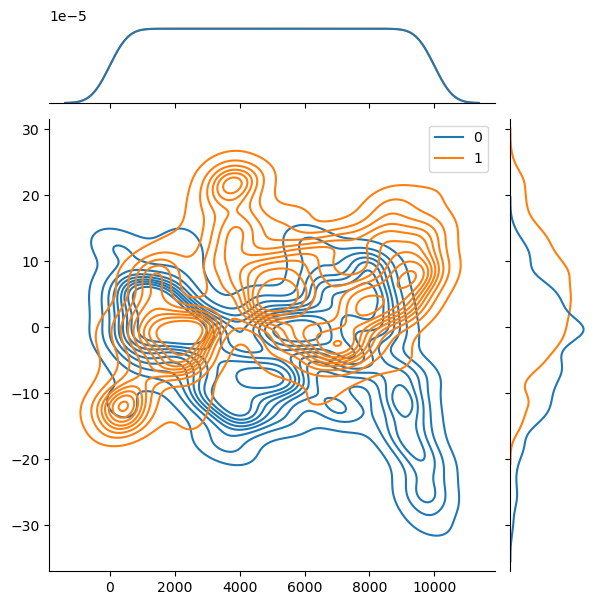

In [60]:
sns.jointplot([dihedrals_1_ml_dft[0,0][:], dihedrals_1_ml_dft[1,0][:]])#, kind="kde")

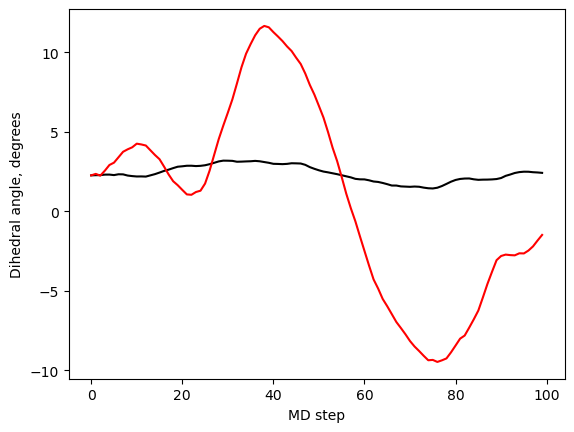

In [55]:
sns.lineplot(data=dihedrals_1_ml_dft[lr][0:100], color='black')
sns.lineplot(data=dihedrals_16_ml_dft[lr][0:100], color='red')
plt.ylabel("Dihedral angle, degrees")
plt.xlabel("MD step")
plt.show()

In [ ]:
import os
from ase.calculators.dftb import Dftb
from ase.io import read
os.environ['OMP_NUM_THREADS'] = "6,1"
os.environ["ASE_DFTB_COMMAND"] = "ulimit -s unlimited; /usr/local/dftbplus-21.2/bin/dftb+ > PREFIX.out"
# os.environ["ASE_DFTB_COMMAND"] = "dftb+ > PREFIX.out"
os.environ["DFTB_PREFIX"] = "/home/qklmn/data/dftb/pbc-0-3"

atoms = read('/home/qklmn/data/starting_configuration/1.cif') # atoms specified here should be the same as in i-pi input file (otherwise atomic order differ, structure blows up!)

atoms_copy = atoms.copy()

atoms_copy.set_pbc(True)

# calc = Dftb(atoms=atoms_copy,
#         label='crystal',
#         Hamiltonian_ = "xTB",
#         Hamiltonian_Method = "GFN1-xTB",
#         # Hamiltonian_MaxAngularMomentum_='',
#         # Hamiltonian_MaxAngularMomentum_O='p',
#         # Hamiltonian_MaxAngularMomentum_H='s',
#         # Hamiltonian_MaxAngularMomentum_N='s',
#         # Hamiltonian_MaxAngularMomentum_C='s',
#         # Hamiltonian_MaxAngularMomentum_Si='s',
#         kpts=(1,1,1),
#         # Hamiltonian_SCC='Yes',
#         # Verbosity=0,
#         # Hamiltonian_OrbitalResolvedSCC = 'Yes',
#         # Hamiltonian_SCCTolerance=1e-15,
#         # kpts=None,
#         # Driver_='ConjugateGradient',
#         # Driver_MaxForceComponent=1e-3,
#         # Driver_MaxSteps=200,
#         # Driver_LatticeOpt = 'Yes',
#         #     Driver_AppendGeometries = 'Yes',
#         #     Driver_='',
#         #     Driver_Socket_='',
#         #     Driver_Socket_File='Hello'
#         )

calc = Dftb(atoms=atoms_copy,
        label='crystal',
        # Hamiltonian_ = "xTB",
        # # Hamiltonian_Method = "GFN1-xTB",
        Hamiltonian_MaxAngularMomentum_='',
        Hamiltonian_MaxAngularMomentum_H='s',
        Hamiltonian_MaxAngularMomentum_O='p',
        Hamiltonian_MaxAngularMomentum_N='p',
        Hamiltonian_MaxAngularMomentum_C='p',
        Hamiltonian_MaxAngularMomentum_Si='d',
        kpts=(2,1,1),
        Hamiltonian_SCC='Yes',
        # Verbosity=0,
        # Hamiltonian_OrbitalResolvedSCC = 'Yes',
        # Hamiltonian_SCCTolerance=1e-15,
        # kpts=None,
        # Driver_='ConjugateGradient',
        # Driver_MaxForceComponent=1e-3,
        # Driver_MaxSteps=200,
        # Driver_LatticeOpt = 'Yes',
        #     Driver_AppendGeometries = 'Yes',
        #     Driver_='',
        #     Driver_Socket_='',
        #     Driver_Socket_File='Hello'
        )

atoms_copy.set_calculator(calc)

# print( atoms_copy.get_potential_energy() )
print( atoms_copy.get_forces() )


In [ ]:
atoms_copy.get_pbc()